In [48]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.quantum_info import Statevector

In [88]:
hidden_string = format(np.random.randint(0, 4), "02b")
hidden_string

'10'

In [57]:
def encode_hidden_string(hidden_string, qc):
    for index, bit in enumerate(hidden_string[::-1]):
        if(bit == '1'):
            qc.cx(index, -1)
    return qc

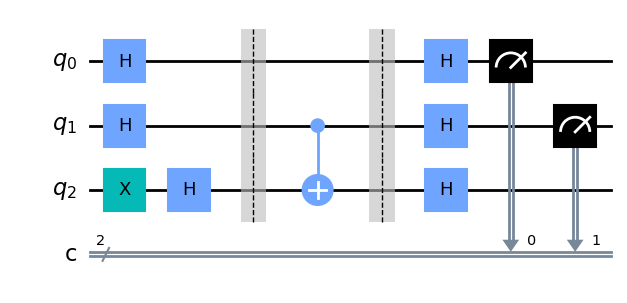

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [90]:
qc = QuantumCircuit(3, 2)
qc.x(-1)
qc.h(range(3))
st0 = Statevector.from_instruction(qc)
qc.barrier()
qc = encode_hidden_string(hidden_string, qc)
qc.barrier()
st1 = Statevector.from_instruction(qc)


qc.h(range(3))
st2 = Statevector.from_instruction(qc)

qc.measure(range(2), range(2))

display(qc.draw("mpl"))
display(st0.draw("latex"))
display(st1.draw("latex"))
display(st2.draw("latex"))

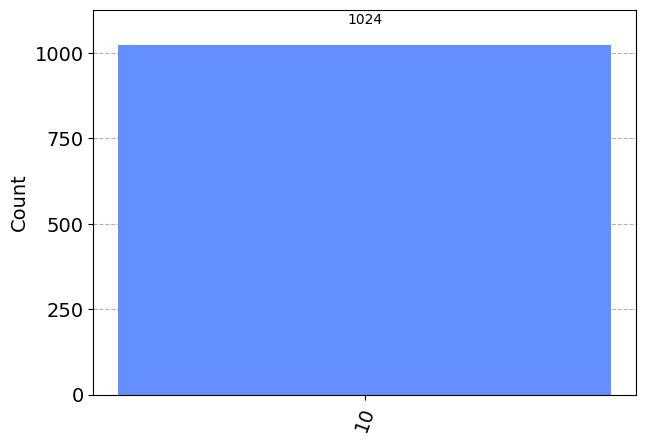

In [91]:
sim = Aer.get_backend("aer_simulator")
results = sim.run(qc).result().get_counts()
plot_histogram(results)

![math test](./bernstein-vazirani.png)